In [1]:
import math
import numpy as np
from typing import List
import copy
from itertools import tee
import matplotlib.pyplot as plt
import ccdm, modulation, pcs, plots
from scipy.stats import gaussian_kde
from scipy.stats import norm

In [2]:
print(np.__version__)

2.2.0


In [3]:
# configuração do PCS-QAM

config = {
            "modulation_type": "qam",
            "constellation_size": 64, 
            "num_modes": 2,
            "show_progress": True,
            "modulation_type" : "pcsqam",
            "pcs_num_symbols" : int(1e2), 
            "lambda_param": 0.1
        }

In [4]:
# Gerar parametros para o algoritmo CCDM
config = pcs.probabilistic_shaping_config(config)
src_symbols = np.random.randint(0, 2, config["num_bits"])
print(f"tamanho da sequencia de bits de entrada: {config['num_bits']}")
# Codificar os símbolos de entrada usando o esquema de modelagem probabilística
Stx, txSyms = pcs.probabilistic_shaping_encode(src_symbols, config)
print(f"tamanho da sequencia de bits de saída: {len(Stx)}")
print(f"Symbols: {txSyms}")

tamanho da sequencia de bits de entrada: 486


/media/caroline/Dados/cimatec/HPC/QuIIN/Algoritmos/CCDM/CCDM/cv-qkd-modsim/ccdm/ccdm.py:128: RuntimeWarning: overflow encountered in scalar subtract
  cc_push.probability = cc_push.upperBound - cc_push.lowerBound
/media/caroline/Dados/cimatec/HPC/QuIIN/Algoritmos/CCDM/CCDM/cv-qkd-modsim/ccdm/ccdm.py:173: RuntimeWarning: divide by zero encountered in scalar floor_divide
  src_interval.lowerBound = np.uint32(np.uint64((src_interval.lowerBound - cc.lowerBound) << 31) // (cc.upperBound - cc.lowerBound))
/media/caroline/Dados/cimatec/HPC/QuIIN/Algoritmos/CCDM/CCDM/cv-qkd-modsim/ccdm/ccdm.py:174: RuntimeWarning: divide by zero encountered in scalar floor_divide
  src_interval.upperBound = np.uint32(np.uint64((src_interval.upperBound - cc.lowerBound) << 31) // (cc.upperBound - cc.lowerBound))
/media/caroline/Dados/cimatec/HPC/QuIIN/Algoritmos/CCDM/CCDM/cv-qkd-modsim/ccdm/ccdm.py:119: RuntimeWarning: overflow encountered in scalar add
  sum_n_i += np.uint32(n_i[i])
/media/caroline/Dados/cimate

KeyboardInterrupt: 

### Variância da distribuição

**Comparação com a Variância Gaussiana**

Para uma distribuição Gaussiana verdadeira $\mathcal{CN}(0, \sigma^2)$:

- A variância é $\sigma^2$ por dimensão (real/imaginária).
- A variância total (potência) para o sinal complexo é $2\sigma^2$.

No caso discreto com DM:
- A variância calculada é a potência média total do sinal modulado.

$\mathrm{Var}(S) = \sum_{i=1}^{M} p_i \cdot |s_i|^2$

In [29]:
variance = np.sum(config["pcs_pOpt"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações calculado por Maxwell-Boltzman: {variance:.4f}")

variance_cons = np.sum(config["pcs_symProb"] * np.abs(config["pcs_IQmap"])**2)
print(f"Variância dos símbolos das constelações após quantização: {variance_cons:.4f}")

variance_sym = np.mean(np.abs(Stx)**2)
print(f"Variância dos símbolos transmitidos: {variance_sym:.4f}")

Variância dos símbolos das constelações calculado por Maxwell-Boltzman: 0.7946
Variância dos símbolos das constelações após quantização: 0.7949
Variância dos símbolos transmitidos: 0.7949


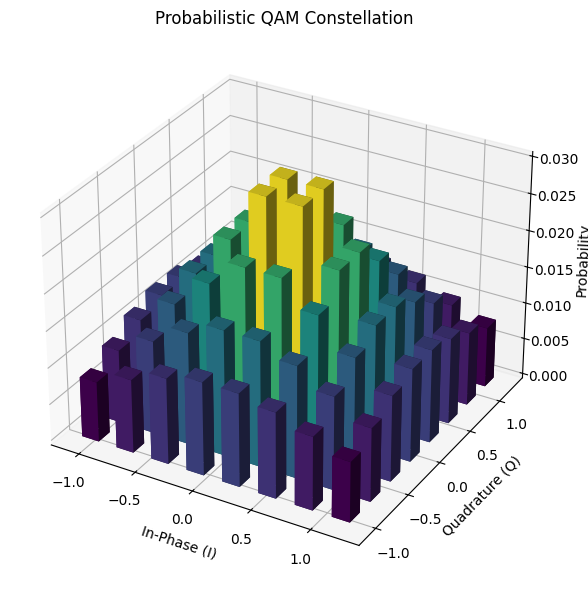

In [30]:
plots.plot_qam_constellation_3d(config["pcs_IQmap"], config["pcs_symProb"])

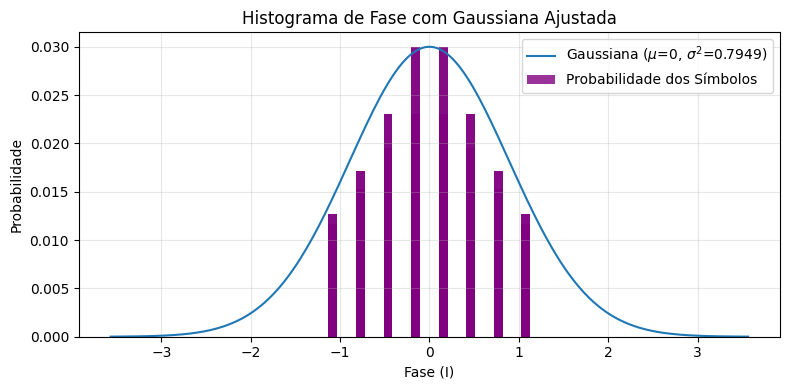

In [31]:
plots.plot_pmf_gaussiana(config["pcs_IQmap"], config["pcs_symProb"], variance_cons, 0)

In [32]:
decoded_symbols = ccdm.decode(txSyms, config["pcs_symFreq"], config["num_bits"])
print("Decoded = ",decoded_symbols)

Decoded =  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1